In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#getting data from yahoo
df = web.DataReader('NLS', data_source = 'yahoo', start='2000-01-01', end = '2020-09-25')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,8.296296,8.055556,8.148148,8.277778,240300.0,7.370835
2000-01-04,8.222222,7.962963,8.111111,7.962963,204863.0,7.090514
2000-01-05,8.000000,7.629630,7.759259,8.000000,360788.0,7.123493
2000-01-06,7.851852,7.666667,7.722222,7.777778,73238.0,6.925617
2000-01-07,7.833333,7.666667,7.796296,7.814815,46913.0,6.958596
...,...,...,...,...,...,...
2020-09-21,17.129999,15.360000,15.740000,16.680000,3830200.0,16.680000
2020-09-22,16.750000,15.010000,16.400000,16.620001,4807900.0,16.620001
2020-09-23,18.100000,16.230000,16.870001,16.379999,3423400.0,16.379999


In [3]:
df.shape

(5217, 6)

Text(0, 0.5, 'Price')

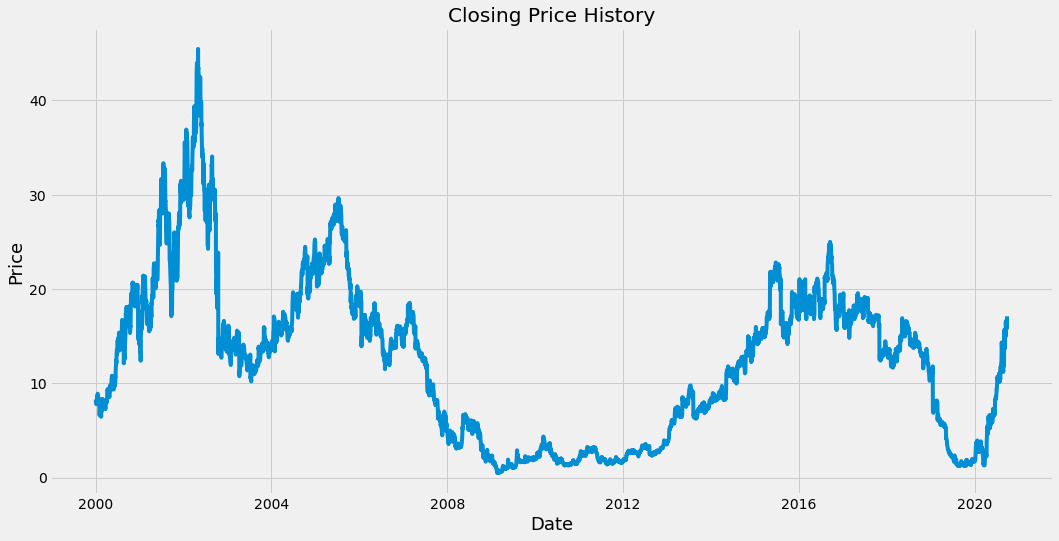

In [4]:
#visulaising graph
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel('Price', fontsize =18)

# Create Dataframe For Neural Net

In [5]:
#neural net df and convert it to arrays
data = df.filter(['Close'])
dataset = data.values

#number of rows to train data on 90%
training_data_len = math.ceil(len(dataset)* .9)
training_data_len

4696

In [6]:
#scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.17358332],
       [0.16658433],
       [0.16740773],
       ...,
       [0.35371274],
       [0.34170742],
       [0.36971988]])

# Create Training Data Set

In [7]:
#create a scaled training data set
train_data = scaled_data[0:training_data_len, :]

#split data on x & y axis
x_train = []
y_train = []

days= 60
#60 of days from now to be tested
for i in range(days, len(train_data)):
    x_train.append(train_data[i-days:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()


[array([0.17358332, 0.16658433, 0.16740773, 0.16246727, 0.16329068,
       0.16740773, 0.16905455, 0.16864287, 0.17975892, 0.1715248 ,
       0.18716961, 0.18305255, 0.17893551, 0.17893551, 0.17893551,
       0.17317161, 0.16658433, 0.1715248 , 0.16411409, 0.1567034 ,
       0.15382145, 0.15217463, 0.13611812, 0.14599904, 0.1567034 ,
       0.16246727, 0.15423314, 0.15587997, 0.15258633, 0.14023517,
       0.13941175, 0.13282446, 0.14764587, 0.14476392, 0.16329068,
       0.17481843, 0.16411409, 0.16740773, 0.17399502, 0.17358332,
       0.16740773, 0.16905455, 0.16576092, 0.16576092, 0.16082045,
       0.16411409, 0.16082045, 0.16411409, 0.16082045, 0.16411409,
       0.15979117, 0.16123214, 0.16082045, 0.16082045, 0.15464487,
       0.15073366, 0.15340973, 0.16164386, 0.16658433, 0.16823114])]
[0.17111309148504417]



In [8]:
#convert x-y train to arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
#reshape to 3 dimension
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4636, 60, 1)

# Bulding LSTM Model

In [10]:
#initializing LSTM 
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#compiling model
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [12]:
#training model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4636/4636 [==============================] - 61s 13ms/step - loss: 0.0014


# Create Testing Dataset

In [13]:
#arrays containing all scaled values
test_data = scaled_data[training_data_len - days:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(days,len(test_data)):
    x_test.append(test_data[i-days:i,0])

In [14]:
#convert data to arrray and reshape it
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [15]:
#getting prediction values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [16]:
#Get root mean squeared error (RMSE)
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

0.008434474353826892

# Plotting Trained Data

<ipython-input-17-e0c263e9c813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


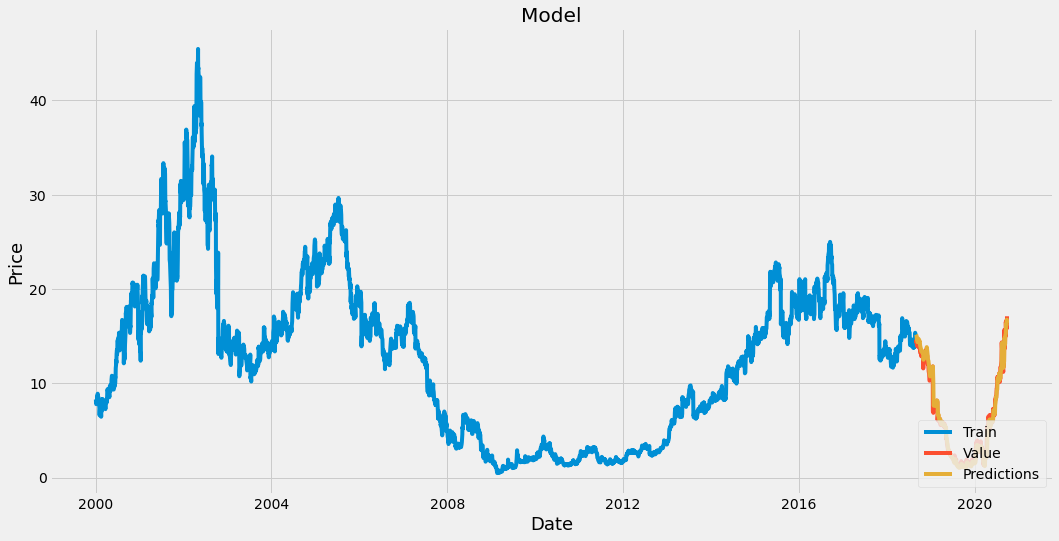

In [17]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction

#visualize data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Value','Predictions'], loc = 'lower right')

In [18]:
#checkign the accuracy of preidcitons
valid

,Close,Predictions
Date,,
2018-08-31,14.650000,15.156236
2018-09-04,14.300000,15.047886
2018-09-05,14.500000,14.838149
2018-09-06,14.200000,14.794874
2018-09-07,14.050000,14.680670
...,...,...
2020-09-21,16.680000,16.147367
2020-09-22,16.620001,16.484430
2020-09-23,16.379999,16.725021


# Use Neural Net to Predict Stock Price

In [20]:
ticker = web.DataReader('NLS', data_source = 'yahoo', start='2000-01-01', end = '2020-09-21')
new_df = ticker.filter(['Close'])

#get amount of closing price depending on days u want we do 60 this case and convert it to array
Days = 60
last_days = new_df[-Days:].values

#scale data to binary values
last_days_scaled = scaler.transform(last_days)

#append scaled tada to epty list and transform it to arrays thenr reshape to 3D arrays
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get prediction prices
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[16.48443]]
